# <center> Practice Case 1
## <center> German Credit Dataset

Here in this notebook, I would like to analyze the German Credit datascore found in [here](https://github.com/arikunco/GermanCredit/ "Github source"). This notebook is a part of practice case of IYKRA training from 21st Oct 2019 - 8th Jan 2020. The notebook starts with an outline about the content and directly answering and analyzing each given instruction.

    Author: Tri Juliansyah M Sambas  
    Date: 24th October 2019  
    Company: PT. Home Credit Indonesia  

<img src="https://d2pa5gi5n2e1an.cloudfront.net/ph/images/article/5960/1b.jpg" alt="Home Credit" width="200" align="left"/>

# Outline
- Library import
- Dataset import
- Part A: 10 questions and answers
- Part B: Creating questions and answers (10 or more)
- Part C: Defining three (or more) possible business problems out of the data set

# Import Libraries

Packages to import:
- numpy: a standard package to deal with scientific computation and numbers
- pandas: a package to handle dataset and read .csv file
- matplotlib: a package to create data visualization
- seaborn: a fancy package to create visualization which cooler than matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

What to do in this section:
- Reading .csv file from the github link [here](https://raw.githubusercontent.com/arikunco/GermanCredit/master/dataset/german_credit_data_with_risk.csv)
- A bit of information regarding dataset (first-last observations and statitics decriptive)

In [2]:
german_credit_df = pd.read_csv('https://raw.githubusercontent.com/arikunco/GermanCredit/master/dataset/german_credit_data_with_risk.csv', encoding = 'latin1', index_col = 0)

**First three** of the observations:

In [3]:
german_credit_df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good


**Last three** of the observations:

In [4]:
german_credit_df.tail(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


**Basic infomation** about the dataframe:

In [5]:
german_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [6]:
numerical = list(german_credit_df.dtypes[german_credit_df.dtypes != 'object'].index)
categorical = list(german_credit_df.dtypes[german_credit_df.dtypes == 'object'].index)     
print('Numerical: ' + str(numerical))
print('Categorical: ' + str(categorical))

Numerical: ['Age', 'Job', 'Credit amount', 'Duration']
Categorical: ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


**Statistics descriptive** of numerical data (can only processed _numerical_ data):

In [7]:
german_credit_df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# Part A
Answering all 10 given questions.

## 1. How many rows and columns reflected in the dataset?

In [8]:
print('The size of your dataset is')
print('Number of rows: ' + str(german_credit_df.shape[0]) + '\nNumber of columns: ' + str(german_credit_df.shape[1]))

The size of your dataset is
Number of rows: 1000
Number of columns: 10


## 2. What is the minimum, maximum, and mean of the customer's age?

In [9]:
print('The youngest customer\'s age is ' + str(german_credit_df['Age'].min()) + ' years old')
print('The oldest customer\'s age is ' + str(german_credit_df['Age'].max()) + ' years old')
print('The average of the customer\'s age is ' + str(german_credit_df['Age'].mean()) + ' years old')

The youngest customer's age is 19 years old
The oldest customer's age is 75 years old
The average of the customer's age is 35.546 years old


## 3. How many are male and how many are female? Why?

In [10]:
print('The number of male customers: ' + str(german_credit_df['Sex'].value_counts()['male']) + ' persons')
print('The number of female customers: ' + str(german_credit_df['Sex'].value_counts()['female']) + ' persons')

The number of male customers: 690 persons
The number of female customers: 310 persons


The **sex ratio** of the customers is **3 : 1** (men vs women)

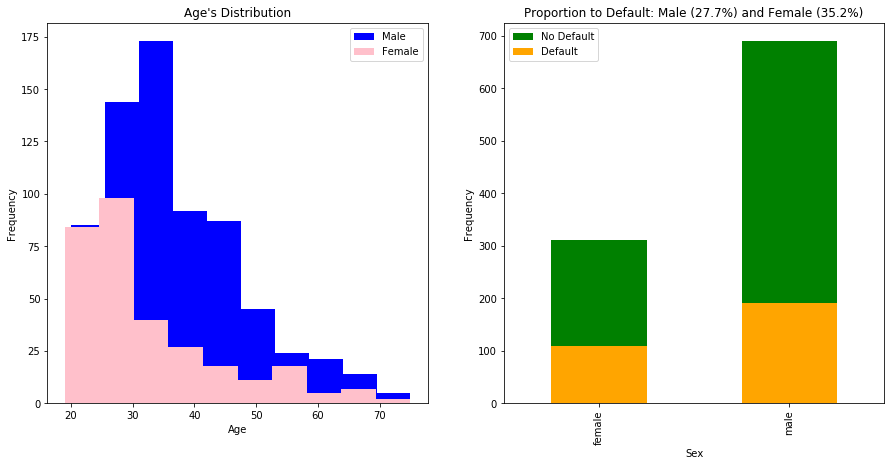

In [11]:
german_credit_df['Default'] = german_credit_df['Risk'].apply(lambda x: 1 if x == 'bad' else 0)
fig = plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
_ = plt.title('Age\'s Distribution')
_ = german_credit_df.loc[german_credit_df['Sex'] == 'male','Age'].plot.hist(color = 'blue')
_ = german_credit_df.loc[german_credit_df['Sex'] == 'female','Age'].plot.hist(color = 'pink')
_ = plt.xlabel('Age')
_ = plt.legend(labels = ['Male', 'Female'])

plt.subplot(1,2,2)
_ = plt.title('Proportion to Default: Male (27.7%) and Female (35.2%)')
_ = german_credit_df['Sex'].value_counts().sort_values().plot.bar(color = 'green')
_ = german_credit_df.groupby(by = 'Sex').sum()['Default'].plot.bar(color = 'orange')
_ = plt.ylabel('Frequency')
_ = plt.legend(labels = ['No Default', 'Default'])

The reason why there are **more men than women** in the dataset maybe because of **more couples in married age (25+)**, let only **the husbands apply for the loans** instead of the wives _(see left figure)_

## 4. How many high skilled workers customers reflected in the dataset?

In [12]:
print('The number of high skilled workers customers are %i persons' % german_credit_df['Job'].value_counts()[3])

The number of high skilled workers customers are 148 persons


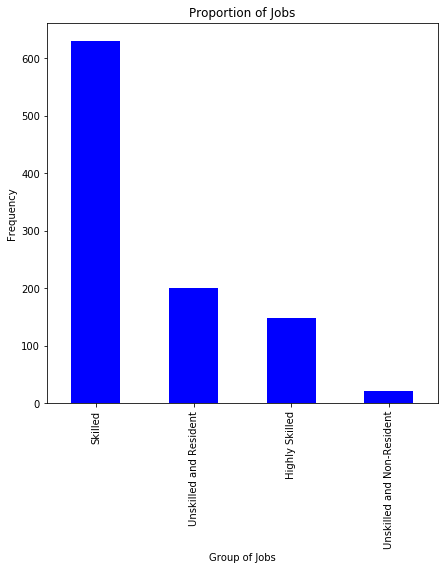

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
_ = ax.set_title('Proportion of Jobs')
_ = german_credit_df['Job'].value_counts().plot.bar(color = 'blue')
_ = ax.set_xlabel('Group of Jobs')
_ = ax.set_xticklabels(labels = ['Skilled', 'Unskilled and Resident', 'Highly Skilled', 'Unskilled and Non-Resident'])
_ = ax.set_ylabel('Frequency')

## 5. How many customers who own the house?

In [14]:
print('The number of customers who own the house are %i persons' % german_credit_df['Housing'].value_counts()['own'])

The number of customers who own the house are 713 persons


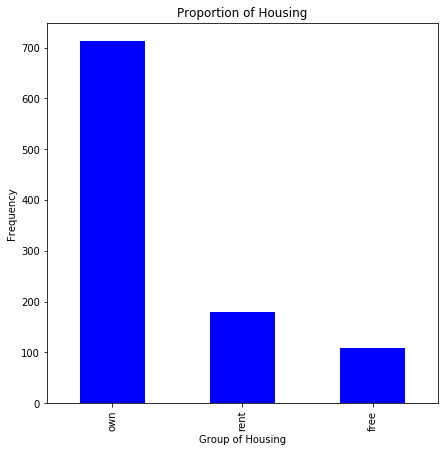

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
_ = ax.set_title('Proportion of Housing')
_ = german_credit_df['Housing'].value_counts().plot.bar(color = 'blue')
_ = ax.set_xlabel('Group of Housing')
_ = ax.set_ylabel('Frequency')

## 6. How many customers who have 'rich' Saving accounts?

In [16]:
print('The number of customers who have \'rich\' on Saving accounts are %i persons' %german_credit_df['Saving accounts'].value_counts()['rich'])

The number of customers who have 'rich' on Saving accounts are 48 persons


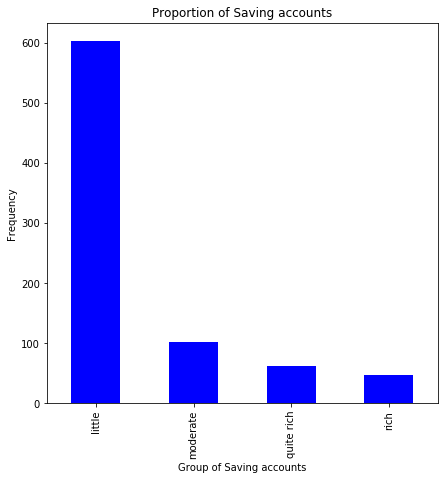

In [17]:
fig, ax = plt.subplots(figsize=(7,7))
_ = ax.set_title('Proportion of Saving accounts')
_ = german_credit_df['Saving accounts'].value_counts().plot.bar(color = 'blue')
_ = ax.set_xlabel('Group of Saving accounts')
_ = ax.set_ylabel('Frequency')

## 7. How many customers who do not have checking accounts or have zero checking account?

In [18]:
print('The number of customers who do not have Checking accounts are %i persons' % (len(german_credit_df) - german_credit_df['Checking account'].value_counts().sum()))

The number of customers who do not have Checking accounts are 394 persons


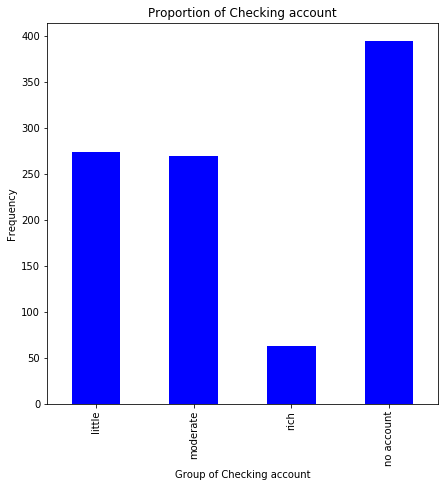

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
_ = ax.set_title('Proportion of Checking account')
_ = german_credit_df['Checking account'].value_counts().append(pd.Series(index = ['no account'], data = len(german_credit_df) - german_credit_df['Checking account'].value_counts().sum())).plot.bar(color = 'blue')
_ = ax.set_xlabel('Group of Checking account')
_ = ax.set_ylabel('Frequency')

## 8. Who is the one who have highest credit amount? Show us the profile of the age, sex, job, housing, saving account, and checking account!

In [20]:
print('Here is the profile of their customer who has the highest credit amount: ')
german_credit_df.sort_values(by = 'Credit amount', ascending = False).loc[915,['Age','Sex','Job','Housing','Saving accounts','Checking account']]

Here is the profile of their customer who has the highest credit amount: 


Age                       32
Sex                   female
Job                        3
Housing                  own
Saving accounts       little
Checking account    moderate
Name: 915, dtype: object

## 9. How many customers are classified as good risk and bad risk?

In [21]:
print('Here is the portofolio of their customers: ')
german_credit_df['Risk'].value_counts()

Here is the portofolio of their customers: 


good    700
bad     300
Name: Risk, dtype: int64

## 10. Is the average of credit amount for good risk is higher than bad risk?

In [22]:
mean_good = german_credit_df.loc[german_credit_df['Risk'] == 'good','Credit amount'].mean()
mean_bad = german_credit_df.loc[german_credit_df['Risk'] == 'bad','Credit amount'].mean()
if mean_good > mean_bad:
    print('Yes! the average of credit amount for good risk customers is HIGHER than bad risk customers.')
else:
    print('No! Too bad! the average of credit amount for good risk customers is LOWER than bad risk customers.')

No! Too bad! the average of credit amount for good risk customers is LOWER than bad risk customers.


# Part B
Creating questions and answer it!

## 1. Can you show the proportion of customer's purpose on taking loans?

Yes, I can! here is the pie chart:


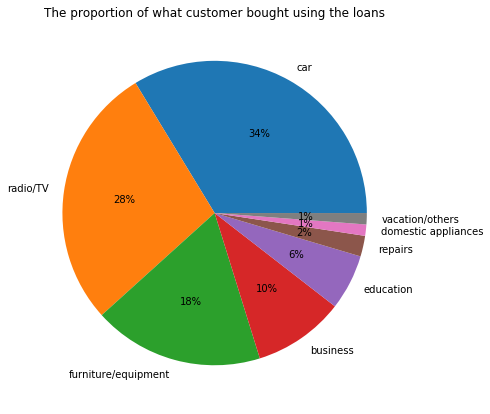

In [23]:
print('Yes, I can! here is the pie chart:')
plt.figure(figsize=(7,7))
_ = plt.title('The proportion of what customer bought using the loans')
_ = german_credit_df['Purpose'].value_counts().plot.pie(autopct='%1.0f%%')
_ = plt.ylabel(None)

##  2. How is the portofolio of customers who do not need to pay for rent or own a house?

There are 179 persons who do not own/rent house. The portofolio of respective persons is depicted below:



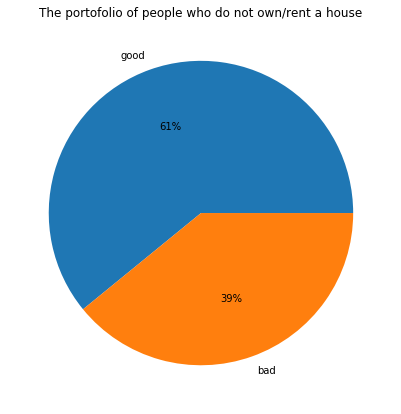

In [24]:
print('There are %i persons who do not own/rent house. The portofolio of respective persons is depicted below:' % len(german_credit_df.loc[german_credit_df['Housing'] == 'rent','Risk']))
plt.figure(figsize=(7,7))
_ = plt.title('The portofolio of people who do not own/rent a house')
_ = german_credit_df.loc[german_credit_df['Housing'] == 'rent','Risk'].value_counts().plot.pie(autopct='%1.0f%%')
_ = plt.ylabel(None)
print( )

## 3. How many people who are rich on both of their accounts but still apply for loan? What do they buy? How much do they loan and for how long?

In [25]:
answer_mask = (german_credit_df['Checking account'] == 'rich') & (german_credit_df['Saving accounts'] == 'rich')
print('There are %i persons who are qualified for the respective question. Here are all the answer: ' % len(german_credit_df.loc[answer_mask, ['Purpose','Credit amount', 'Duration']]))
german_credit_df.loc[answer_mask, ['Purpose','Credit amount', 'Duration']]

There are 3 persons who are qualified for the respective question. Here are all the answer: 


,Purpose,Credit amount,Duration
27,radio/TV,409,12
140,car,709,6
729,business,1275,24


## 4. Can the purpose of loan be an indicator of default customers? Please explain why?

In [26]:
german_credit_df[german_credit_df['Risk'] == 'bad']['Purpose'].value_counts()/german_credit_df['Purpose'].value_counts()*100

business               35.051546
car                    31.454006
domestic appliances    33.333333
education              38.983051
furniture/equipment    32.044199
radio/TV               22.142857
repairs                36.363636
vacation/others        41.666667
Name: Purpose, dtype: float64

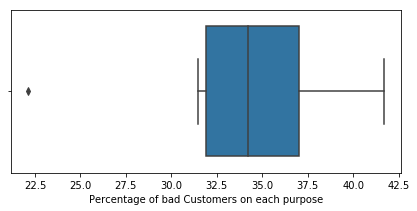

In [27]:
plt.figure(figsize=(7,3))
_ = sns.boxplot(german_credit_df[german_credit_df['Risk'] == 'bad']['Purpose'].value_counts()/german_credit_df['Purpose'].value_counts()*100)
_ = plt.xlabel('Percentage of bad Customers on each purpose')

Using this dataset is **not possible** to conclude such condition. Looking at two outputs above, the average bad rates on each purpose it is about the same between **30-40%** of *customers will default in any type of purpose*. **However**, the boxplot also shows that if people purchase **radio/TV** by applying loan then they are **less likely** to **default**. Thus, we could only say that _getting people who would like purchase radio/TV as the purpose of loan, we will have less bad customers_.

## 5. How much money the customers spent on car?

In [28]:
print('They spent about %i DM on cars' % german_credit_df.groupby(by = 'Purpose').sum()['Credit amount']['car'])

They spent about 1269881 DM on cars


## 6. What kind of distribution of credit amount on good and bad customers?

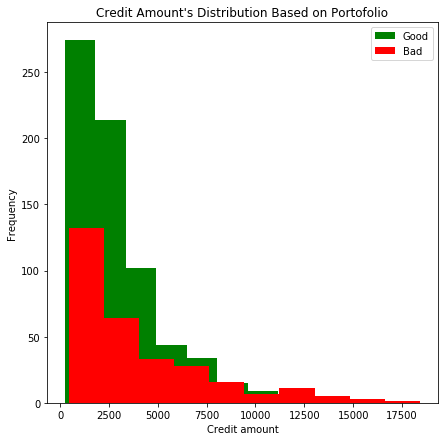

In [29]:
plt.figure(figsize=(7,7))
_ = plt.title('Credit Amount\'s Distribution Based on Portofolio')
_ = german_credit_df.loc[german_credit_df['Risk'] == 'good','Credit amount'].plot.hist(color = 'green')
_ = german_credit_df.loc[german_credit_df['Risk'] == 'bad','Credit amount'].plot.hist(color = 'red')
_ = plt.xlabel('Credit amount')
_ = plt.legend(labels = ['Good', 'Bad'])

Most of default customers are taking loan **less than 6000 DM** and on loan **higher than 9000 DM**, bad customers are more likely than good customers.

## 7. How much of credit amount for every customer's type of job who apply for loan?

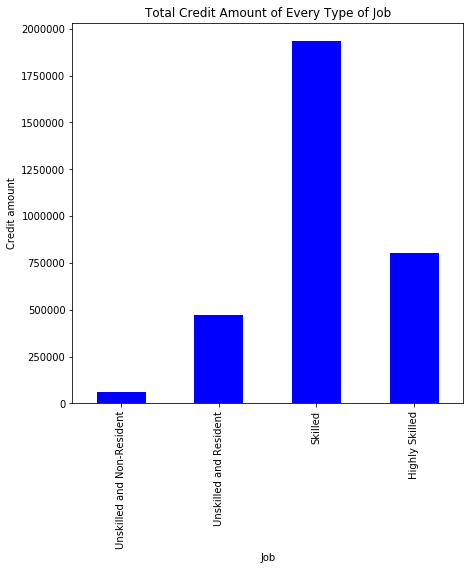

In [30]:
fig, ax = plt.subplots(figsize=(7,7))
_ = ax.set_title('Total Credit Amount of Every Type of Job')
_ = german_credit_df.groupby(by = 'Job').sum()['Credit amount'].plot.bar(color = 'blue')
_ = ax.set_xticklabels(labels = ['Unskilled and Non-Resident', 'Unskilled and Resident','Skilled','Highly Skilled'])
_ = ax.set_ylabel('Credit amount')

## 8. Related to the question 7, how long do they usually take the loans?

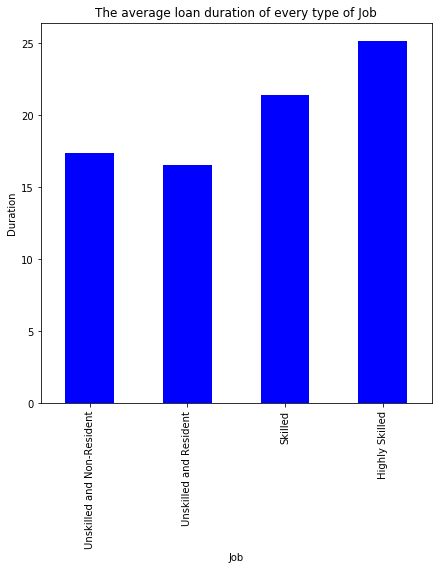

In [31]:
fig, ax = plt.subplots(figsize=(7,7))
_ = ax.set_title('The average loan duration of every type of Job')
_ = german_credit_df.groupby(by = 'Job').mean()['Duration'].plot.bar(color = 'blue')
_ = ax.set_xticklabels(labels = ['Unskilled and Non-Resident', 'Unskilled and Resident','Skilled','Highly Skilled'])
_ = ax.set_ylabel('Duration')

## 9. How does the distribution of Age look like based on Portofolio?

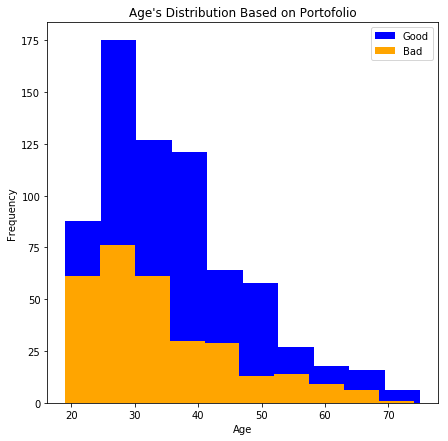

In [32]:
plt.figure(figsize=(7,7))
_ = plt.title('Age\'s Distribution Based on Portofolio')
_ = german_credit_df[german_credit_df['Risk'] == 'good']['Age'].plot.hist(color = 'blue')
_ = german_credit_df[german_credit_df['Risk'] == 'bad']['Age'].plot.hist(color = 'orange')
_ = plt.xlabel('Age')
_ = plt.legend(labels = ['Good', 'Bad'])

## 10. Do they have customers who are 'rich' on their saving account but they still default?

In [33]:
print('Yes, they have. There are %i persons who meet the criteria.' % len(german_credit_df[(german_credit_df['Risk'] == 'bad') & (german_credit_df['Saving accounts'] == 'rich')]))

Yes, they have. There are 6 persons who meet the criteria.


# Part C: Business Problems
Business problems that could be made by the current dataset.

## Case 1: Loan Marketing target based on popular products

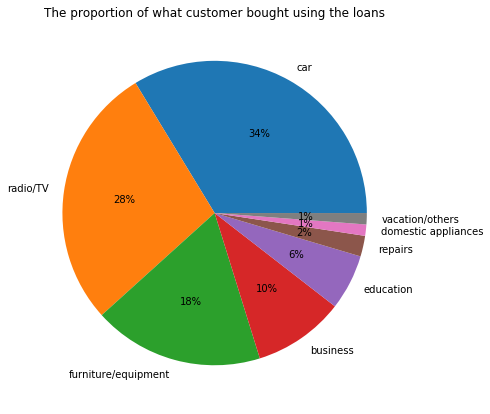

In [34]:
plt.figure(figsize=(7,7))
_ = plt.title('The proportion of what customer bought using the loans')
_ = german_credit_df['Purpose'].value_counts().plot.pie(autopct='%1.0f%%')
_ = plt.ylabel(None)

As we have seen the pie chart above, most of customers bought **car, radio/TV, and furniture/equipment** thereby focusing on advertisement on this type of product will lead to *higher chance to obtain customers*. However, we should take this for granted since the rest of the percentages **(20%)** still contribute to the profit gain for the company.

## Case 2: Personalized advertisement based on age group (Customer Segmentation)

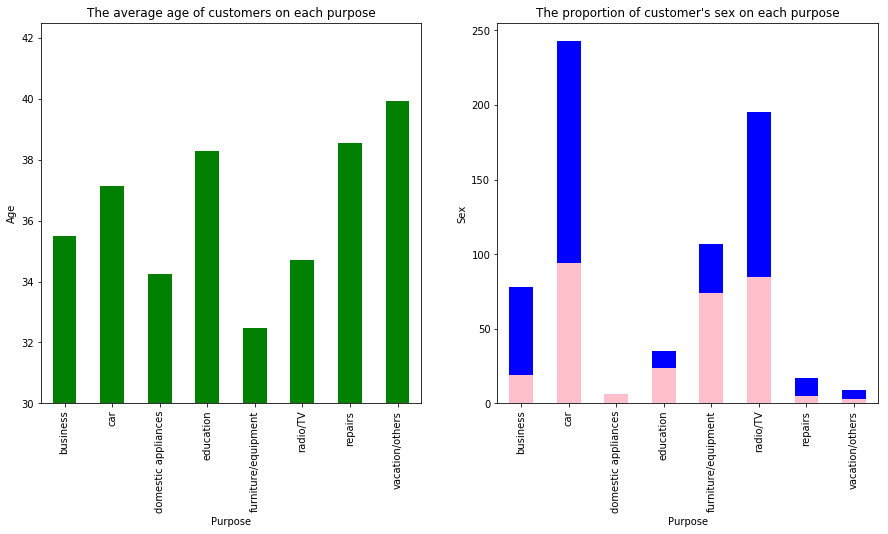

In [35]:
german_credit_df['male?'] = german_credit_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
fig = plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
_ = plt.title('The average age of customers on each purpose')
_ = german_credit_df.groupby(by = 'Purpose').mean()['Age'].plot.bar(color = 'green')
_ = plt.ylim([30,42.5])
_ = plt.ylabel('Age')

plt.subplot(1,2,2)
_ = plt.title('The proportion of customer\'s sex on each purpose')
_ = german_credit_df.groupby(by = 'Purpose').sum()['male?'].plot.bar(color = 'blue')
_ = (german_credit_df.groupby(by = 'Purpose').count()['male?'] - german_credit_df.groupby(by = 'Purpose').sum()['male?']).plot.bar(color = 'pink')
_ = plt.ylabel('Sex')

In addition to previous case, we could also create customers segmentation case out of this data firstly **based on age and their loan purposes**. *Despite* the mean age differences between each purpose are **not significant** but we can take some *key information*, for example on *what age level of customers who need loan for vacation/others* then we can give them offers for loan which related to other people on their same age level needs. Furthermore, we need to **include more data points** to allow better suggestions for the customers, for instance, we can add *Sex as one of factors*.

## Case 3: Know Your Customers (KYC)

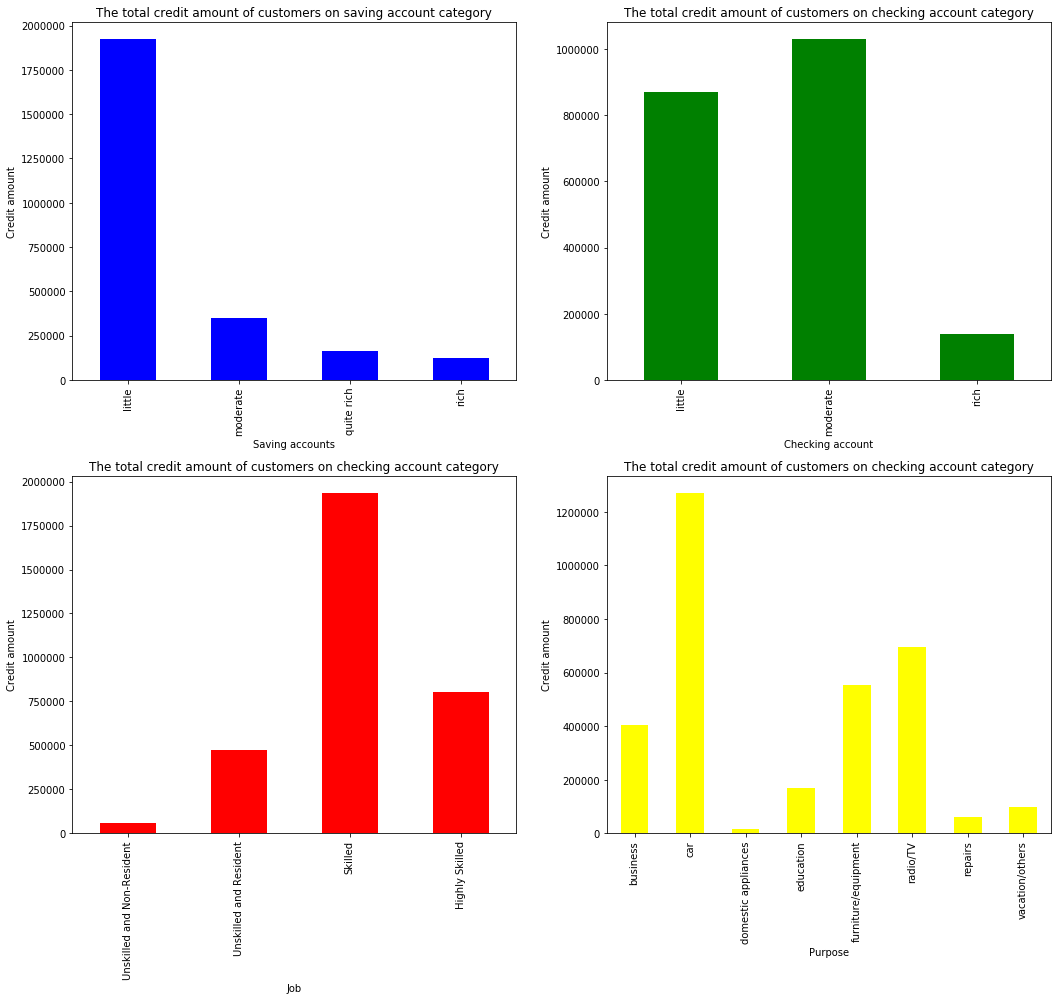

In [36]:
fig = plt.figure(figsize = (15,14))

plt.subplot(2,2,1)
_ = plt.title('The total credit amount of customers on saving account category')
_ = german_credit_df.groupby(by = 'Saving accounts').sum()['Credit amount'].plot.bar(color = 'blue')
_ = plt.ylabel('Credit amount')

plt.subplot(2,2,2)
_ = plt.title('The total credit amount of customers on checking account category')
_ = german_credit_df.groupby(by = 'Checking account').sum()['Credit amount'].plot.bar(color = 'green')
_ = plt.ylabel('Credit amount')

ax = plt.subplot(2,2,3)
_ = plt.title('The total credit amount of customers on checking account category')
_ = german_credit_df.groupby(by = 'Job').sum()['Credit amount'].plot.bar(color = 'red')
_ = plt.ylabel('Credit amount')
_ = ax.set_xticklabels(labels = ['Unskilled and Non-Resident', 'Unskilled and Resident','Skilled','Highly Skilled'])

plt.subplot(2,2,4)
_ = plt.title('The total credit amount of customers on checking account category')
_ = german_credit_df.groupby(by = 'Purpose').sum()['Credit amount'].plot.bar(color = 'yellow')
_ = plt.ylabel('Credit amount')

_ = plt.tight_layout()

Knowing your customers preference and customers background are **very important** in the business. For example, **for marketing team**, they could really find the niche of the customer's purpose on taking loans and **for scoring team**, they could weight one factor than the others because of a certain type of behaviour on each variable or data point. 